# Simple cvlib
A simple, high level, easy-to-use open source Computer Vision library for Python.

https://github.com/arunponnusamy/cvlib

By: [Ibrahim Sobh](https://eg.linkedin.com/in/ibrahim-sobh-phd-8681757)

## Face detection

In [ ]:
!pip install cvlib

In [1]:
import cvlib as cv

ModuleNotFoundError: No module named 'cvlib'

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [0]:
!wget -nv https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/i/b179b54a-c6c2-4d81-8417-1bb908ea5ec1/d8b6j3m-66864f8e-23b1-4e04-9c74-7cbb1ca706df.png -O img01.jpg

In [0]:
image = cv2.imread('./img01.jpg')
cv2_imshow(image)

In [0]:
faces, confidences = cv.detect_face(image)
print(faces, confidences)

[[139, 194, 200, 283], [230, 322, 293, 412], [409, 144, 464, 224], [42, 134, 101, 218], [236, 142, 290, 215], [322, 220, 374, 294]] [0.99819237, 0.9957593, 0.99435943, 0.9931196, 0.9920201, 0.97978264]


In [0]:
# loop through detected faces
for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

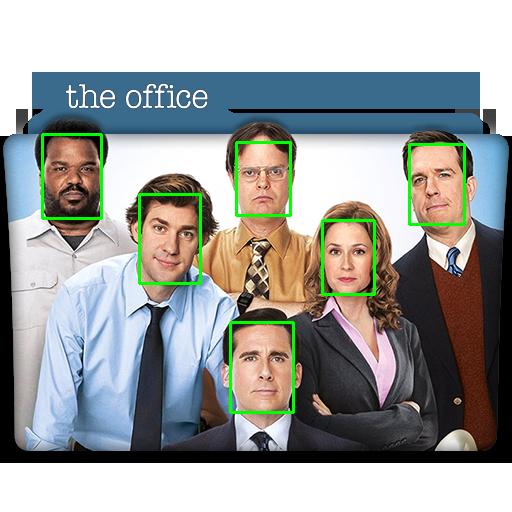

In [0]:
cv2_imshow(image)

## Gender detection

2019-12-27 15:56:04 URL:https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/i/b179b54a-c6c2-4d81-8417-1bb908ea5ec1/d8b6j3m-66864f8e-23b1-4e04-9c74-7cbb1ca706df.png [342198/342198] -> "img02.png" [1]


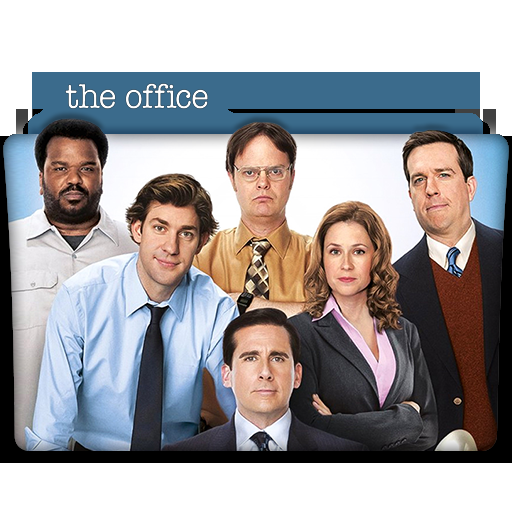

In [0]:
!wget -nv https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/i/b179b54a-c6c2-4d81-8417-1bb908ea5ec1/d8b6j3m-66864f8e-23b1-4e04-9c74-7cbb1ca706df.png -O img02.png
image = cv2.imread('./img02.png')
cv2_imshow(image)

In [0]:
faces, confidences = cv.detect_face(image)
print(faces, confidences)

[[139, 194, 200, 283], [230, 322, 293, 412], [409, 144, 464, 224], [42, 134, 101, 218], [236, 142, 290, 215], [322, 220, 374, 294]] [0.99819237, 0.9957593, 0.99435943, 0.9931196, 0.9920201, 0.97978264]


In [0]:
padding = 10 

# loop through detected faces
for f in faces:

    (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
    (endX,endY) = min(image.shape[1]-1, f[2]+padding), min(image.shape[0]-1, f[3]+padding)
    
    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (255,128,0), 2)

    face_crop = np.copy(image[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cv.detect_gender(face_crop)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.1f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

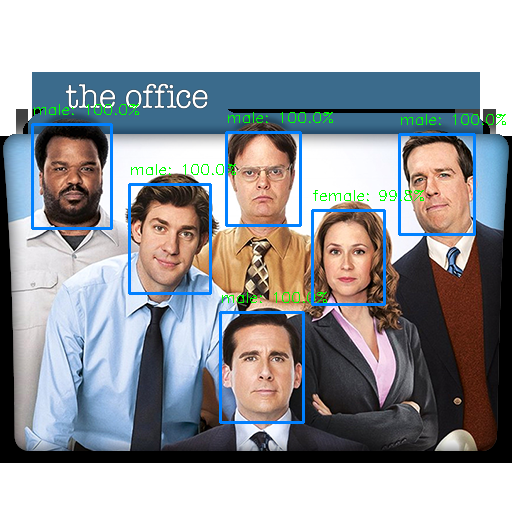

In [0]:
cv2_imshow(image)

## Object detection

2019-12-27 16:06:14 URL:https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg [192644/192644] -> "traffic.jpg" [1]


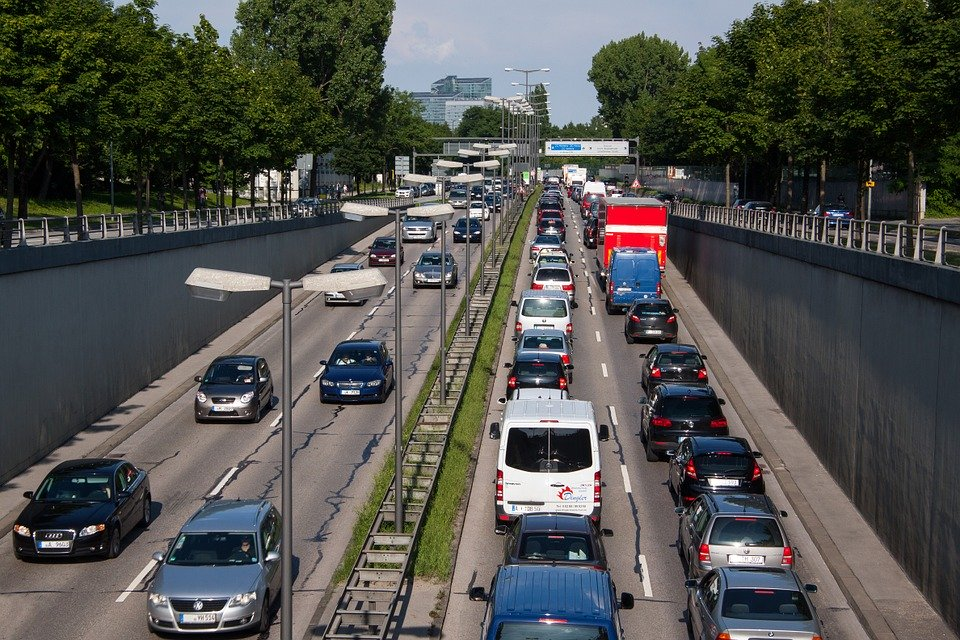

In [0]:
!wget -nv https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O traffic.jpg
image = cv2.imread('./traffic.jpg')
cv2_imshow(image)

In [0]:
# def detect_common_objects(image, confidence=0.5, nms_thresh=0.3, model='yolov3' or 'yolov3-tiny')
bbox, label, conf = cv.detect_common_objects(image, confidence=0.3)
print(bbox, label, conf)

[[8, 458, 158, 562], [196, 354, 276, 422], [316, 343, 394, 401], [642, 345, 706, 387], [142, 502, 288, 634], [686, 564, 828, 640], [409, 256, 455, 288], [623, 301, 677, 343], [472, 562, 644, 642], [399, 218, 435, 242], [509, 353, 569, 395], [454, 217, 482, 241], [695, 512, 789, 578], [675, 434, 753, 490], [528, 259, 574, 297], [365, 239, 399, 267], [643, 395, 723, 453], [512, 290, 574, 340], [306, 264, 380, 306], [602, 200, 668, 310], [322, 255, 368, 271], [534, 230, 562, 248], [506, 511, 596, 561], [538, 218, 562, 236], [486, 405, 604, 535], [536, 206, 562, 226], [540, 193, 562, 209], [531, 240, 563, 260], [456, 194, 482, 210], [820, 208, 852, 220], [518, 326, 568, 354], [484, 195, 500, 209], [737, 199, 769, 211], [230, 536, 256, 558], [445, 184, 469, 200], [530, 252, 568, 272], [691, 490, 773, 528], [400, 180, 434, 198]] ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'truck', 'car', 'car', 'car', '

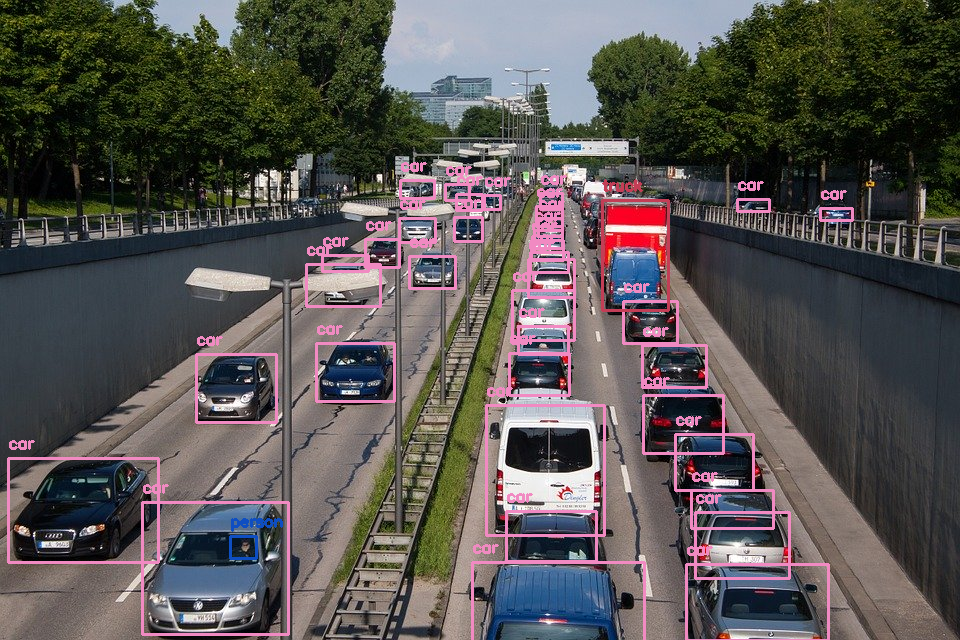

In [0]:
# def draw_bbox(img, bbox, labels, confidence, colors=None, write_conf=False):
out = cv.object_detection.draw_bbox(image, bbox, label, conf)
cv2_imshow(out)